In [2]:
## pip install tensorflow
## pip install numpy
## pip install --upgrade h5py

import tensorflow as tf
import numpy as np
from tensorflow import keras

### Next, you will create the simplest possible neural network. It has 1 layer with 1 neuron, and the input shape to it is just 1 value. You will build this model using Keras' Sequential class which allows you to define the network as a sequence of layers. You can use a single Dense layer to build this simple network as shown below.

In [5]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model


### Now, you will compile the neural network. When you do so, you have to specify 2 functions: a loss and an optimizer.

In [6]:
# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

### Next up, you will feed in some data. In this case, you are taking 6 X's and 6 Y's. You can see that the relationship between these is y=2x-1, so where x = -1, y=-3 etc.

In [7]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Training the Nueral Network 

### The process of training the neural network, where it 'learns' the relationship between the x's and y's is in the model.fit() call. This is where it will go through the loop we spoke about above: making a guess, measuring how good or bad it is (aka the loss), using the optimizer to make another guess etc. It will do it for the number of epochs you specify. When you run this code, you'll see the loss on the right hand side.

In [11]:
# Train the model
model.fit(xs, ys, epochs=1500)

Epoch 1/1500
1/1 [==============================] - 0s 6ms/step - loss: 2.8023e-05
Epoch 2/1500
1/1 [==============================] - 0s 4ms/step - loss: 2.7448e-05
Epoch 3/1500
1/1 [==============================] - 0s 4ms/step - loss: 2.6884e-05
Epoch 4/1500
1/1 [==============================] - 0s 5ms/step - loss: 2.6331e-05
Epoch 5/1500
1/1 [==============================] - 0s 5ms/step - loss: 2.5790e-05
Epoch 6/1500
1/1 [==============================] - 0s 5ms/step - loss: 2.5261e-05
Epoch 7/1500
1/1 [==============================] - 0s 5ms/step - loss: 2.4743e-05
Epoch 8/1500
1/1 [==============================] - 0s 4ms/step - loss: 2.4234e-05
Epoch 9/1500
1/1 [==============================] - 0s 4ms/step - loss: 2.3736e-05
Epoch 10/1500
1/1 [==============================] - 0s 5ms/step - loss: 2.3248e-05
Epoch 11/1500
1/1 [==============================] - 0s 5ms/step - loss: 2.2771e-05
Epoch 12/1500
1/1 [==============================] - 0s 5ms/step - loss: 2.2303e-05
E

In [9]:
# Make a prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 87ms/step
[[18.984394]]


In [10]:
# Make a prediction
print(model.predict([100.0]))

1/1 [==============================] - 0s 36ms/step
[[198.78084]]


# CNN

In [16]:
import tensorflow as tf

print(tf.__version__)

2.13.1


In [19]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist


In [23]:
type(fmnist)

module

In [24]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [29]:
training_images.shape

(60000, 28, 28)

In [33]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [35]:
training_labels.shape

(60000,)

In [36]:
test_images.shape

(10000, 28, 28)

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

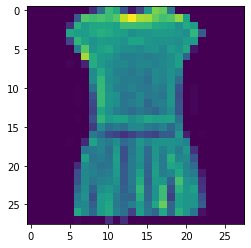

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
for i in range(0,4):
    index = i


# Set number of characters per row when printing
    np.set_printoptions(linewidth=1000)

# Print the label and image
    print(f'LABEL: {training_labels[index]}')
    print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')
# Visualize the image
    plt.imshow(training_images[index])

In [45]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this lecture if you want to know more about the Softmax function and how the values are computed.

In [46]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [47]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [48]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4980 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3730 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3378 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3133 - accuracy: 0.8851
Epoch 5/5
313/313 [==============================] - 0s 866us/step - loss: 0.3627 - accuracy: 0.8671


[0.36269789934158325, 0.8671000003814697]

E1Q1: What does this list represent?
It's 10 random meaningless values
It's the first 10 classifications that the computer made
It's the probability that this item is each of the 10 classes
Click for Answer
Answer:
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

E1Q2: How do you know that this list tells you that the item is an ankle boot?
There's not enough information to answer that question
The 10th element on the list is the biggest, and the ankle boot is labelled 9
The ankle boot is label 9, and there are 0->9 elements in the list
Click for Answer
Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot



In [49]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 752us/step
[1.3728759e-05 2.3162607e-09 5.7190238e-07 1.6614413e-07 7.5586269e-07 5.1082503e-02 5.9028075e-06 4.1879322e-02 7.4109284e-06 9.0700948e-01]


In [50]:
print(test_labels[0])

9


# Lab2 

Ungraded Lab: Using Callbacks to Control Training
In this lab, you will use the Callbacks API to stop training when a specified metric is met. This is a useful feature so you won't need to complete all epochs when this threshold is reached. For example, if you set 1000 epochs and your desired accuracy is already reached at epoch 200, then the training will automatically stop. Let's see how this is implemented in the next sections.

## Load and Normalize the Fashion MNIST dataset

Like the previous lab, you will use the Fashion MNIST dataset again for this exercise. And also as mentioned before, you will normalize the pixel values to help optimize the training.

In [53]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Creating a Callback class
You can create a callback by defining a class that inherits the tf.keras.callbacks.Callback base class. From there, you can define available methods to set where the callback will be executed. For instance below, you will use the on_epoch_end() method to check the loss at each training epoch.

In [54]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [55]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
Now you are ready to train the model. To set the callback, simply set the callbacks parameter to the myCallback instance you declared before. Run the cell below and observe what happens.

In [56]:
# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4759 - accuracy: 0.8307
Epoch 2/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.3596 - accuracy: 0.8680
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3594 - accuracy: 0.8680


You will notice that the training does not need to complete all 10 epochs. By having a callback at the end of each epoch, it is able to check the training parameters and compare if it meets the threshold you set in the function definition. In this case, it will simply stop when the loss falls below 0.40 after the current epoch.

# Optional Challenge: Modify the code to make the training stop when the accuracy metric exceeds 60%.


In [57]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('accuracy') < 60):

      # Stop if threshold is met
      print("\nAccuracy is more than 60% so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [58]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4711 - accuracy: 0.8320
Accuracy is more than 60% so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4711 - accuracy: 0.8320


# June 30: Week 3

# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions
# Shallow Neural Network
In the previous lessons, you saw how to do fashion recognition using a neural network containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and only one hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy. For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

/Users/vamsivivektejaa/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4937 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3364 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3135 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8919

MODEL EVALUATION:
313/313 [==============================] - 0s 873us/step - loss: 0.3468 - accuracy: 0.8805


# Convolutional Neural Network

In the model above, your accuracy will probably be about 89% on training and 87% on validation. Not bad. But how do you make that even better? One way is to use something called convolutions. We're not going into the details of convolutions in this notebook (please see resources in the classroom), but the ultimate concept is that they narrow down the content of the image to focus on specific parts and this will likely improve the model accuracy.

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing))), then convolutions will look very familiar. In short, you take an array (usually 3x3 or 5x5) and scan it over the entire image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 matrix that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision because it often highlights features that distinguish one item from another. Moreover, the amount of information needed is then much less because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focused and possibly more accurate.

Run the code below. This is the same neural network as earlier, but this time with Convolution and MaxPooling layers added first. It will take longer, but look at the impact on the accuracy.

In [5]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

It's likely gone up to about 92% on the training data and 90% on the validation data. That's significant, and a step in the right direction!

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a Conv2D layer. The parameters are:

The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
The size of the Convolution. In this case, a 3x3 grid.
The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.
In the first layer, the shape of the input data.
You'll follow the convolution with a MaxPool2D layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convolution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
Then you added another convolution and flattened the output.

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
  
After this, you'll just have the same DNN structure as the non convolutional version. The same dense layer with 128 neurons, and output layer with 10 neurons as in the pre-convolution example:

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Overfitting

Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called overfitting. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

In [6]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=20)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# Visualizing the Convolutions and Pooling

Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (i.e. 9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [7]:
print(test_labels[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 16ms/step


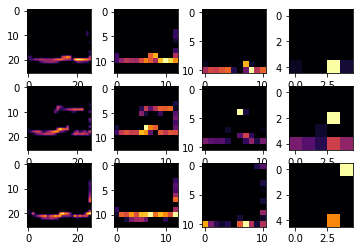

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 5

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# EXERCISES

## 1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

In [14]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

### Finding: When 32 was changed to 16: the accuracy and loss suffered. The accuracy was better for conv2d with 32 over 16

### 2. Remove the final Convolution. What impact will this have on accuracy or training time?

In [15]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               346240    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 347690 (1.33 MB)
Trainable params: 347690 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Finding: Training time is less when the 2nd convulution was removed

## 3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.



In [16]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 16)          2320      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 1, 1, 16)         

### Finding: The Accuracy was worse when an additional convultion layer was introduced

## 4.Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

### Finding: Best Accuracy and least time trained. Does it mean that having just 1 convultion layer is the most optimized way to train the CNN? Perhaps!!

# Quiz 
## 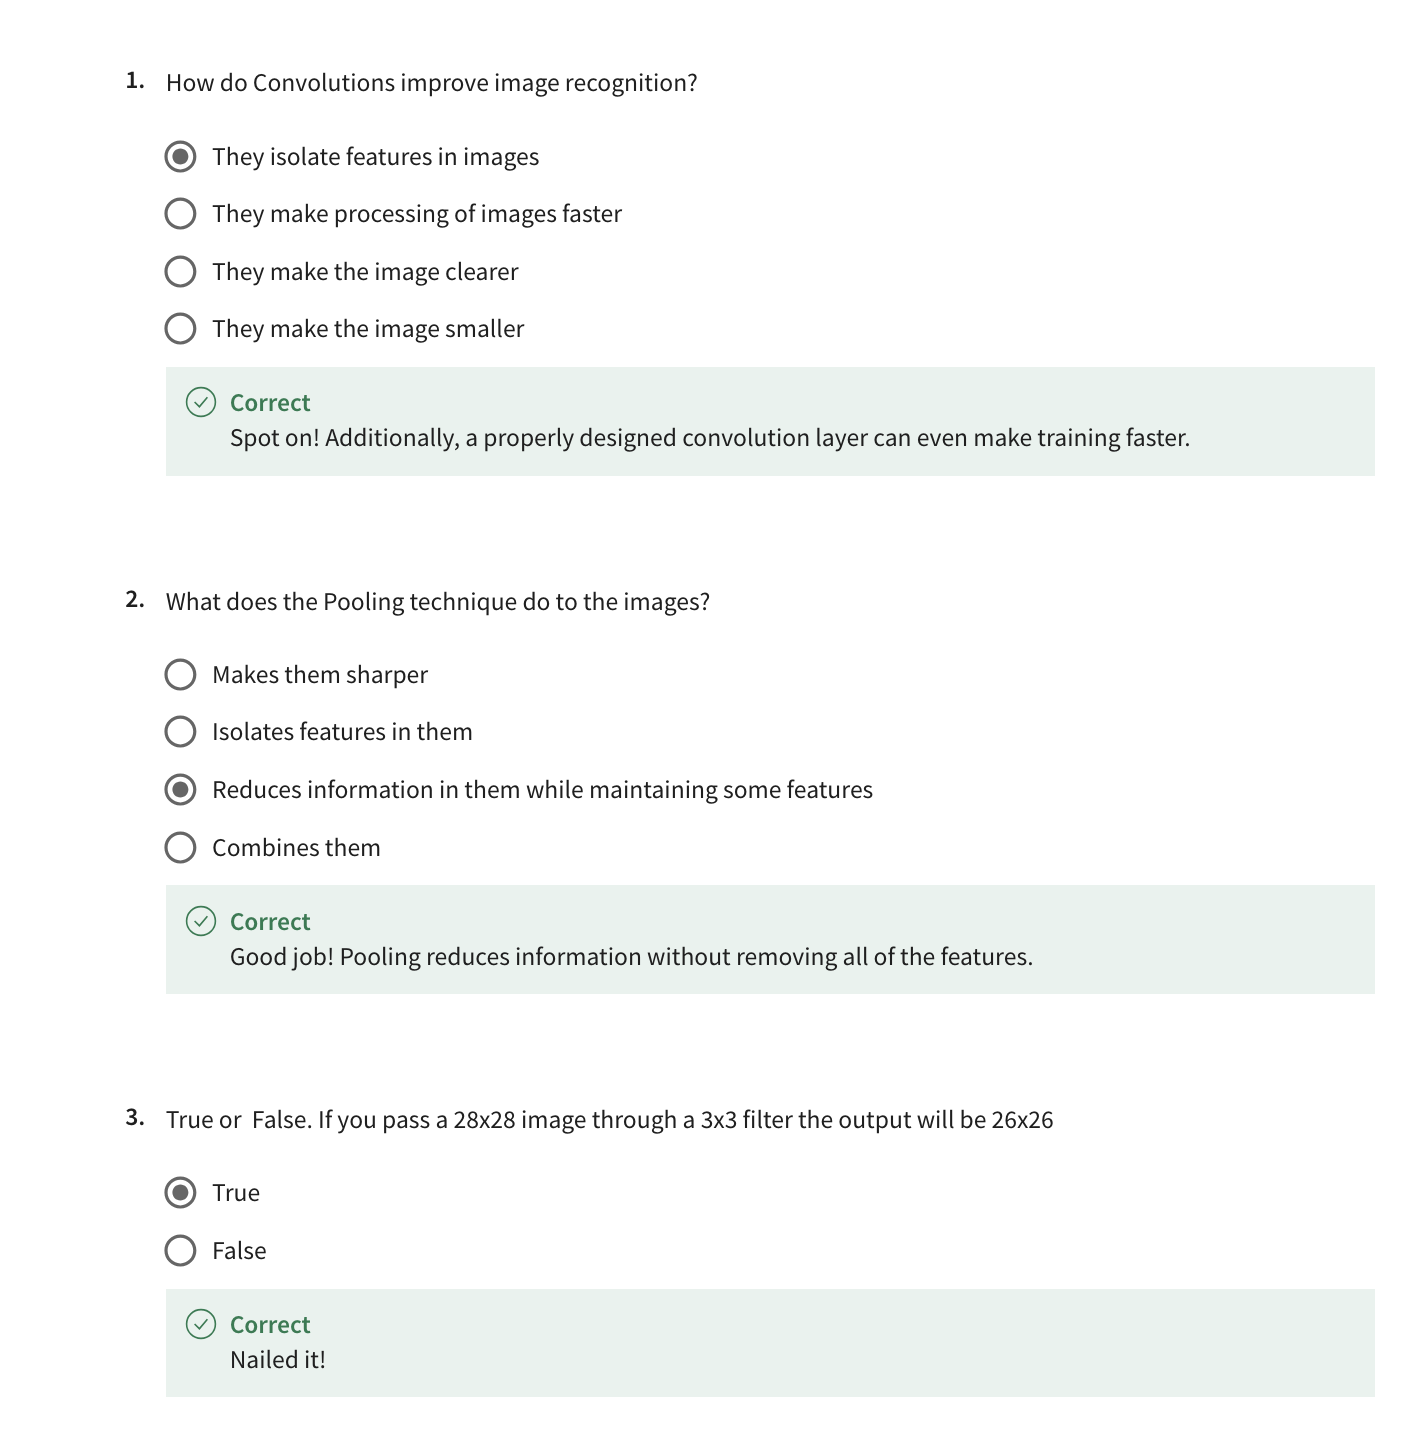

# Ungraded Lab: Exploring Convolutions
In this lab, you will explore how convolutions work by creating a basic convolution on a 2D grayscale image. First, you will load the image by taking the ascent image from SciPy. It's a nice, built-in picture with lots of angles and lines.

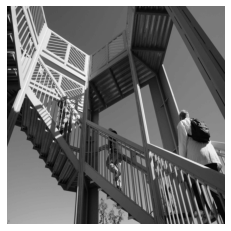

In [19]:
import os
from PIL import Image

# Change the working directory to the Downloads folder
downloads_path = os.path.expanduser("~/Downloads")
os.chdir(downloads_path)

# Load the image
image_path = 'Week_3_Image.jpg'  # Replace with your image file name in the Downloads folder
image = Image.open(image_path)

# Convert the image to greyscale
greyscale_image = image.convert('L')

# Resize the image to 512x512 pixels
resized_image = greyscale_image.resize((512, 512))

# Save the processed image
resized_image.save('processed_image.jpg')

# Display the image
#resized_image.show()



import matplotlib.pyplot as plt

# Visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(resized_image)
plt.show()

## The image is stored as a numpy array so you can create the transformed image by first copying that array. You can also get the dimensions of the image so you can loop over it later.



In [20]:
#The image is stored as a numpy array so you can create the transformed image by first copying that array. 
#You can also get the dimensions of the image so you can loop over it later.
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(resized_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [33]:
# Now you can create a filter as a 3x3 array.
# Experiment with different values and see the effect
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

## Now you can create a convolution. You will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)

## You'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

## Finally you'll load the new value into the transformed image.

In [34]:
# Iterate over the image
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (image_transformed[x-1, y-1] * filter[0][0])
        convolution = convolution + (image_transformed[x-1, y] * filter[0][1])  
        convolution = convolution + (image_transformed[x-1, y+1] * filter[0][2])     
        convolution = convolution + (image_transformed[x, y-1] * filter[1][0])    
        convolution = convolution + (image_transformed[x, y] * filter[1][1])    
        convolution = convolution + (image_transformed[x, y+1] * filter[1][2])    
        convolution = convolution + (image_transformed[x+1, y-1] * filter[2][0])    
        convolution = convolution + (image_transformed[x+1, y] * filter[2][1])    
        convolution = convolution + (image_transformed[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
        convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255

      # Load into the transformed image
        image_transformed[x, y] = convolution

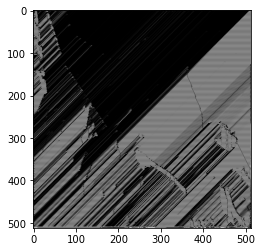

In [35]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()   

# Effect of Max Pooling
The next cell will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. It will take the largest of them and load it into the new image. Thus, the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

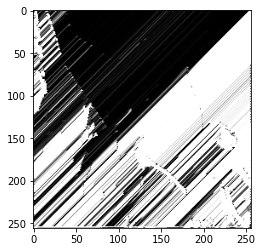

In [36]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      

# Week 3 Lab Assignment 

In [37]:
# grader-required-cell

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# grader-required-cell

# Load the data

# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(current_dir, "data/mnist.npz")

# Get only training set
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)


# grader-required-cell

# GRADED FUNCTION: reshape_and_normalize

def reshape_and_normalize(images):
    
    ### START CODE HERE

    # Reshape the images to add an extra dimension
    images = np.expand_dims(images, axis=-1)
    
    # Normalize pixel values
    images = images/255.0
    
    ### END CODE HERE

    return images


# grader-required-cell

# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path=data_path)

# Apply your function
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")



# grader-required-cell

# GRADED CLASS: myCallback
### START CODE HERE
class myCallback(tf.keras.callbacks.Callback):
# Remember to inherit from the correct class
    def on_epoch_end(self, epoch, logs={}):
    
    # Check the loss
        if (logs.get('accuracy') > 0.995):
                print("\nReached 99.5% accuracy so cancelling training!")
        self.model.stop_training = True
            
            

### END CODE HERE


def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
      
      
      
      
    ])
    ### END CODE HERE

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
        
    return model


# grader-required-cell

# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it ' 
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])


# grader-required-cell

print(f"Your model was trained for {len(history.epoch)} epochs")



if not "accuracy" in history.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vamsivivektejaa/Downloads/data/mnist.npz'